## Convergence analysis for a GMM with two components

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
SEED = 4
np.random.seed(SEED)
torch.manual_seed(SEED)

### High noise regime

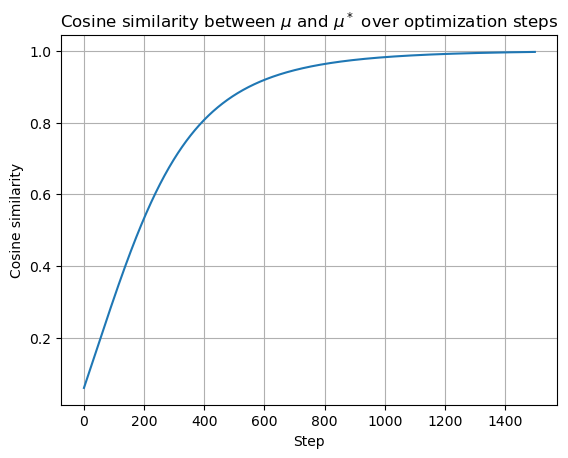

In [52]:
# Parameters
d = 128           # Dimensionality
n_samples = 100      # Number of samples
t = 1e-1               # Noise scale
a = 1 / (t + 1)        # Scaling factor
lr = 0.1               # Learning rate
n_steps = 1500      # Number of optimization steps

# True mean vector
true_mu = 20*torch.ones(d)

# Generate samples: X0 ~ 0.5*N(mu, I) + 0.5*N(-mu, I)
components = torch.randint(0, 2, (n_samples,)) * 2 - 1
X0 = components.unsqueeze(1) * true_mu + torch.randn(n_samples, d)

# Noise
G = torch.randn(n_samples, d)
y_t = t * X0 + (t ** 0.5) * G

# Initialize parameter vector mu
#mu = torch.randn(d, requires_grad=True)
mu = torch.normal(0, torch.tensor(10.0), size=(d,), requires_grad=True)

# Track cosine similarity between mu and true_mu
cosines = []

# Optimization loop
for step in range(n_steps):
    s = torch.sum(y_t * mu, dim=1)
    tanh_term = torch.tanh(a * s)
    m_theta = a * (y_t + tanh_term.unsqueeze(1) * mu)

    loss = F.mse_loss(X0, m_theta)
    loss.backward()

    with torch.no_grad():
        mu -= lr * mu.grad
        mu.grad.zero_()
        cos_sim = torch.dot(mu, true_mu) / (mu.norm() * true_mu.norm())
        cosines.append(cos_sim.item())

# Plot cosine similarity over time
plt.plot(cosines)
plt.xlabel("Step")
plt.ylabel("Cosine similarity")
plt.title("Cosine similarity between $\\mu$ and $\\mu^*$ over optimization steps")
plt.grid(True)
plt.show()

#print(mu)

### Low noise regime

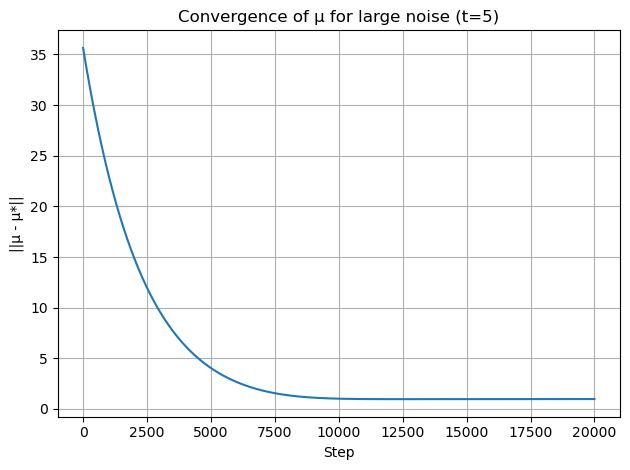

tensor([20.0974, 20.0419, 19.9716, 19.9977, 20.1885, 20.0714, 20.1166, 19.9866,
        20.0405, 19.9096, 19.9714, 20.0955, 20.0589, 20.0769, 20.0671, 19.9345,
        20.0683, 20.0042, 20.0082, 20.0036, 19.9284, 19.9502, 20.0778, 19.9333,
        19.9736, 19.8116, 19.9501, 19.9802, 20.0757, 19.8943, 19.9921, 19.8572,
        20.0707, 20.0383, 19.8409, 20.1901, 20.0328, 20.2074, 20.1712, 20.0104,
        20.0508, 19.9698, 20.0169, 19.9469, 20.0758, 20.1096, 19.9096, 20.0748,
        19.8855, 20.0465, 20.1330, 20.0629, 19.8967, 19.9062, 19.9359, 20.1105,
        20.0642, 20.1163, 20.0811, 20.0156, 20.0707, 19.9956, 19.8713, 19.8931,
        19.9345, 20.0085, 20.0046, 19.9845, 20.1823, 20.0818, 19.9818, 19.9479,
        20.1131, 19.9179, 20.0046, 19.9993, 20.0422, 19.9058, 19.7665, 20.0950,
        20.0432, 20.1394, 20.0251, 19.9677, 20.0417, 19.9241, 19.9394, 20.0459,
        19.9488, 20.0692, 19.9762, 20.0002, 19.9221, 20.0431, 20.1405, 20.1345,
        19.8575, 20.1105, 19.9976, 20.05

In [50]:
t = 5
a = 1 / (t + 1)
n_steps = 20000
lr = 1
norms = []

G = torch.randn(n_samples, d)
y_t = t * X0 + (t ** 0.5) * G


for step in range(n_steps):
    dot = torch.sum(y_t *mu, dim=1)  # ⟨y_t, mu⟩
    tanh_term = torch.tanh(dot / (2 * (t + 1)))
    #m_theta = a * (y_t + tanh_term.unsqueeze(1)*mu)
    m_theta = a*(t*X0+torch.tanh(torch.sum(X0 *mu, dim=1)).unsqueeze(1)*mu)
    loss = F.mse_loss(X0, m_theta)

    loss.backward()
    with torch.no_grad():
        mu -= lr * mu.grad
        mu.grad.zero_()
        norms.append((mu- true_mu).norm().item())  #


# Plot evolution of ||mu - mu*||
plt.plot(norms)
plt.xlabel("Step")
plt.ylabel("||μ - μ*||")
plt.title(f"Convergence of μ for large noise (t={t})")
plt.grid(True)
plt.tight_layout()
plt.show()

print(mu)